## 第2章 pandasのデータ構造
### 2.1 データを自作する
#### 2.1.1 Seriesを作る

In [ ]:
import pandas as pd
s = pd.Series(["banana", 42])
display("Seriesを作る", s)

In [ ]:
import polars as pl
s = pl.Series(name = None, values = ["banana", 42])
display("Seriesを作る", s)

#### 2.1.2 DataFrameを作る

In [ ]:
import pandas as pd
scientists = pd.DataFrame({
    "Name": ["Rosaline Franklin", "William Gosset"],
    "Occupation": ["Chemist", "Statistician"],
    "Born": ["1920-07-25", "1876-06-13"],
    "Died": ["1958-04-16", "1937-10-16"]
    })
display("DataFrameは辞書型として作るのが最も一般的である", scientists)

In [ ]:
import polars as pl
scientists = pl.DataFrame({
    "Name": ["Rosaline Franklin", "William Gosset"],
    "Occupation": ["Chemist", "Statistician"],
    "Born": ["1920-07-25", "1876-06-13"],
    "Died": ["1958-04-16", "1937-10-16"]
    })
display("DataFrameは辞書型として作るのが最も一般的である", scientists)

In [ ]:
# indexはpandasのみ
import pandas as pd
scientists = pd.DataFrame({
    "Occupation": ["Chemist", "Statistician"],
    "Born": ["1920-07-25", "1876-06-13"],
    "Died": ["1958-04-16", "1937-10-16"],
    "Age": [37, 61]
    },
    index = ["Rosaline Franklin", "William Gosset"],
    columns = ["Occupation", "Born", "Died", "Age"])
display("Index付きDataFrameはpandasのみ", scientists)

In [ ]:
# polarsのDataFrame作成に関するtips
import polars as pl
data = {
    "Name": ["Rosaline Franklin", "William Gosset"],
    "Occupation": ["Chemist", "Statistician"],
    "Born": ["1920-07-25", "1876-06-13"],
    "Died": ["1958-04-16", "1937-10-16"],
    "Age": [37, 61]
    }
scientists = pl.DataFrame(data = data, schema = {
    "Name": pl.Utf8,
    "Occupation": pl.Utf8,
    "Born": pl.Date,
    "Died": pl.Date,
    "Age": pl.Int64
    })
scientists
display("polarsでDataFrame作成時に各列のデータ型を指定したい場合、辞書型を使用する(その1)", scientists)

scientists = pl.DataFrame(data = data, schema = [
    ("Name", pl.Utf8),
    ("Occupation", pl.Utf8),
    ("Born", pl.Date),
    ("Died", pl.Date),
    ("Age", pl.Int64)
    ])
display("tupleのlistでも各列のデータ型を指定できる(その2)", scientists)

data = [
    pl.Series("Name", ["Rosaline Franklin", "William Gosset"], dtype = pl.Utf8),
    pl.Series("Occupation", ["Chemist", "Statistician"], dtype = pl.Utf8),
    pl.Series("Born", ["1920-07-25", "1876-06-13"], dtype = pl.Date),
    pl.Series("Died", ["1958-04-16", "1937-10-16"], dtype = pl.Date),
    pl.Series("Age", [37, 61], dtype = pl.Int64)
]
scientists = pl.DataFrame(data = data)
display("SeriesのリストとしてDataFrameを定義する", scientists)

### 2.2 Seriesについて

In [ ]:
import pandas as pd
scientists = pd.DataFrame({
    "Occupation": ["Chemist", "Statistician"],
    "Born": ["1920-07-25", "1876-06-13"],
    "Died": ["1958-04-16", "1937-10-16"],
    "Age": [37, 61]
    },
    index = ["Rosaline Franklin", "William Gosset"],
    columns = ["Occupation", "Born", "Died", "Age"])
display("DataFrameの再表示", scientists)

first_row = scientists.loc["William Gosset"]
display("indexがWilliam Gossetの行(第2行)のデータ型", type(first_row))
display("William Gosset行のindex", first_row.index)
display("William Gosset行の各要素", first_row.values)
display("William Gosset行の各キー", first_row.keys())
display("William Gosset行のindexの最初の要素", first_row.index[0])
display("William Gosset行の各キーの最初の要素", first_row.keys()[0])

In [ ]:
import polars as pl
data = [
    pl.Series("Name", ["Rosaline Franklin", "William Gosset"], dtype = pl.Utf8),
    pl.Series("Occupation", ["Chemist", "Statistician"], dtype = pl.Utf8),
    pl.Series("Born", ["1920-07-25", "1876-06-13"], dtype = pl.Date),
    pl.Series("Died", ["1958-04-16", "1937-10-16"], dtype = pl.Date),
    pl.Series("Age", [37, 61], dtype = pl.Int64)
]
scientists = pl.DataFrame(data = data)
display("DataFrameの再表示", scientists)

# polarsにはindexがないので、filterで取得する
first_row = scientists.filter( pl.col("Name") == "William Gosset" )
display("indexがWilliam Gossetの行(第2行)のデータ型", type(first_row))
# polarsのkey関係はよくわからなかった
#display("William Gosset行のindex", first_row.index)
#display("William Gosset行の各要素", first_row.values)
#display("William Gosset行の各キー", first_row.keys())
#display("William Gosset行のindexの最初の要素", first_row.index[0])
#display("William Gosset行の各キーの最初の要素", first_row.keys()[0])

#### 2.2.1 Seriesは、ndarrayに似たもの
#### 2.2.1.1 Seriesのメソッド

In [ ]:
import pandas as pd
scientists = pd.DataFrame({
    "Occupation": ["Chemist", "Statistician"],
    "Born": ["1920-07-25", "1876-06-13"],
    "Died": ["1958-04-16", "1937-10-16"],
    "Age": [37, 61]
    },
    index = ["Rosaline Franklin", "William Gosset"],
    columns = ["Occupation", "Born", "Died", "Age"])
ages = scientists["Age"]
display("Age列", ages)
print("Age列の平均値\n", ages.mean(), "\n")
print("最小値\n", ages.min(), "\n")
print("最大値\n", ages.max(), "\n")
print("標準偏差\n", ages.std(), "\n")

In [ ]:
import polars as pl
data = [
    pl.Series("Name", ["Rosaline Franklin", "William Gosset"], dtype = pl.Utf8),
    pl.Series("Occupation", ["Chemist", "Statistician"], dtype = pl.Utf8),
    pl.Series("Born", ["1920-07-25", "1876-06-13"], dtype = pl.Date),
    pl.Series("Died", ["1958-04-16", "1937-10-16"], dtype = pl.Date),
    pl.Series("Age", [37, 61], dtype = pl.Int64)
]
ages = scientists["Age"]
display("Age列", ages)
print("Age列の平均値\n", ages.mean(), "\n")
print("最小値\n", ages.min(), "\n")
print("最大値\n", ages.max(), "\n")
print("標準偏差\n", ages.std(), "\n")

In [ ]:
import pandas as pd
# 初心者でもわかる！やさしい統計用語①「相関関係」 | データで越境者に寄り添うメディア データのじかん
# https://data.wingarc.com/statistics-for-beginners-01-46546
s1 = pd.Series([20, 21, 30, 25, 27, 33, 25, 26, 27, 28])
s2 = pd.Series([20, 32, 50, 30, 56, 62, 50, 47, 25, 36])
display("気温", s1)
display("アイスの販売数量", s2)
print("気温とアイスの販売数量の相関係数\n", s1.corr(s2), "\n")
print("気温とアイスの販売数量の共分散\n", s1.cov(s2), "\n")
display("気温の要約統計量", s1.describe())
display("気温列から重複のない要素を返す", s1.drop_duplicates())
print("気温と販売数量で同じ要素を含んでいるかを確認する\n", s1.equals(s2), "\n")
print("気温の最小値\n", s1.min(), "\n")
print("気温の最大値\n", s1.max(), "\n")
print("気温の算術平均\n", s1.mean(), "\n")
print("気温の中央値\n", s1.median(), "\n")
print("気温の最頻値\n", s1.mode(), "\n")
print("気温の第1四分位数\n", s1.quantile(q = 0.25), "\n")
display("気温列の値を1つ指定して、もう一つの指定値で上書きする", s1.replace(to_replace = {33: 9000}))
display("いくつかの要素を抽出する", s1.sample(n = 3, random_state = 42))
display("ソートする", s1.sort_values())
display("DataFrameに変換する", s1.to_frame())
display("転置する", s1.transpose())
display("ユニーク値を返す", s1.unique())

In [ ]:
import polars as pl
# 初心者でもわかる！やさしい統計用語①「相関関係」 | データで越境者に寄り添うメディア データのじかん
# https://data.wingarc.com/statistics-for-beginners-01-46546
s1 = pl.Series("Temperature", [20, 21, 30, 25, 27, 33, 25, 26, 27, 28])
s2 = pl.Series("Number of units sold", [20, 32, 50, 30, 56, 62, 50, 47, 25, 36])
df = pl.DataFrame([
    s1,
    s2
])
display("気温", s1)
display("アイスの販売数量", s2)
display("気温とアイスの販売数量の相関係数", df.select(pl.corr("Temperature", "Number of units sold")))
display("気温とアイスの販売数量の共分散", df.select(pl.cov("Temperature", "Number of units sold")))
display("気温の要約統計量", s1.describe())
#display("気温列から重複のない要素を返す", s1.drop_duplicates())
print("気温と販売数量で同じ要素を含んでいるかを確認する\n", s1.equals(s2), "\n")
print("気温の最小値\n", s1.min(), "\n")
print("気温の最大値\n", s1.max(), "\n")
print("気温の算術平均\n", s1.mean(), "\n")
print("気温の中央値\n", s1.median(), "\n")
print("気温の最頻値\n", s1.mode(), "\n")
print("気温の第1四分位数\n", s1.quantile(quantile = 0.25), "\n")
display("気温列の値を1つ指定して、もう一つの指定値で上書きする", s1.replace(mapping = {33: 9000}))
display("いくつかの要素を抽出する", s1.sample(n = 3, seed = 42))
display("ソートする", s1.sort())
display("DataFrameに変換する", s1.to_frame())
#display("転置する", s1.transpose())
display("ユニーク値を返す", s1.unique())

### 2.2.2 Seriesを真偽値で絞り込む
ローカルフォルダに保存したデータを読み込むときは、下図のようなフォルダ構造を想定しています。

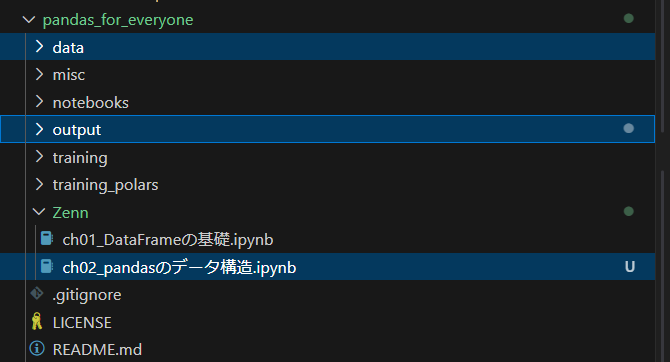

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")
display("読み込んだデータを確認する", scientists)
ages = scientists["Age"]
display("年齢列", ages)
display("要約統計量", ages.describe())
print("要約統計量\n", ages.mean(), "\n")
display("平均より高い値だけ絞り込む", ages[ages > ages.mean()])
print("絞り込みのデータ型\n", type(ages > ages.mean()), "\n")

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")
display("読み込んだデータを確認する", scientists)
ages = scientists["Age"]
display("年齢列", ages)
display("要約統計量", ages.describe())
print("要約統計量\n", ages.mean(), "\n")
display("平均より高い値だけ絞り込む", ages.filter( ages > ages.mean() ))
print("絞り込みのデータ型\n", type(ages > ages.mean()), "\n")

#### 2.2.3 演算の自動的な整列とベクトル化(ブロードキャスティング)
##### 2.2.3.1 同じ長さのベクトル

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")
ages = scientists["Age"]
display("ベクトルの和", ages + ages)
display("アダマール積", ages + ages)

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")
ages = scientists["Age"]
display("ベクトルの和", ages + ages)
display("アダマール積", ages + ages)

#### 2.2.3.2 ベクトルと整数値(スカラー)

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")
ages = scientists["Age"]
display("ベクトルの全ての要素にスカラーを加える", ages + 100)
display("ベクトルとスカラーの積", ages * 2)

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")
ages = scientists["Age"]
display("ベクトルの全ての要素にスカラーを加える", ages + 100)
display("ベクトルとスカラーの積", ages * 2)

### 2.3 DataFrameについて
#### 2.3.1 DataFrameの構成要素

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")
display("index列を取り出す", scientists.index)
display("列名", scientists.columns)
display("要素", scientists.values)
#display("arrow形式", scientists.to_arrow())
#display("辞書型", scientists.to_dicts())

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")
#display("index列を取り出す", scientists.index)
display("列名", scientists.columns)
display("要素", scientists.to_numpy())
display("arrow形式", scientists.to_arrow())
display("辞書型", scientists.to_dicts())

#### 2.3.2 DataFrameを真偽値で絞り込む

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")
display("真偽値で絞り込む", scientists.loc[ scientists["Age"] > scientists["Age"].mean() ])

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")
display("真偽値で絞り込む", scientists.filter( scientists["Age"] > scientists["Age"].mean() ).sort("Name"))
display("マイナーチェンジ 1", scientists.filter( pl.col("Age") > scientists["Age"].mean() ).sort("Name"))
display("マイナーチェンジ 2", scientists.filter( scientists["Age"] > pl.col("Age").mean() ).sort("Name"))
display("マイナーチェンジ 3", scientists.filter( pl.col("Age") > pl.col("Age").mean() ).sort("Name"))
display("マイナーチェンジ 4", scientists.filter( pl.col("Age") > pl.mean("Age") ).sort("Name"))

### 2.4 SeriesとDataFrameの書き換え

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")
display("各列のデータ型", scientists.dtypes)

born_datetime = pd.to_datetime(scientists["Born"], format = "%Y-%m-%d")
display("生年月日のDateTime型", born_datetime)

died_datetime = pd.to_datetime(scientists["Died"], format = "%Y-%m-%d")
display("死亡日のDateTime型", died_datetime)

scientists["born_dt"], scientists["died_dt"] = (
    born_datetime,
    died_datetime
)
display("列追加後のDataFrame", scientists)

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")
display("各列のデータ型", scientists.dtypes)

born_datetime = scientists["Born"].str.to_date(format = "%Y-%m-%d")
display("生年月日のDateTime型", born_datetime)

died_datetime = scientists["Died"].str.to_date(format = "%Y-%m-%d")
display("死亡日のDateTime型", died_datetime)

scientists = scientists.with_columns([
    born_datetime.alias("born_dt"),
    died_datetime.alias("died_dt")
])
display("列追加後のDataFrame", scientists)

### 2.4.2 列を直接変更する

In [ ]:
import pandas as pd
import numpy as np
scientists = pd.read_csv("../data/scientists.csv")

scientists["born_dt"], scientists["died_dt"] = (
    pd.to_datetime(scientists["Born"], format = "%Y-%m-%d"),
    pd.to_datetime(scientists["Died"], format = "%Y-%m-%d")
)

scientists["age_days"] = (
    scientists["died_dt"] - scientists["born_dt"]
)
scientists["age_years"] = (
    scientists["age_days"] / np.timedelta64(1, "ns") / (365.2425 * 24 * 60 * 60 * 1e9)
)
display("生年月日から死亡日までの年数を追加したDataFrame", scientists)

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")

scientists = scientists.with_columns([
    scientists["Born"].str.to_date(format = "%Y-%m-%d").alias("born_dt"),
    scientists["Died"].str.to_date(format = "%Y-%m-%d").alias("died_dt")
])


scientists = scientists.with_columns([
    (scientists["died_dt"] - scientists["born_dt"]).alias("age_days")
])
scientists = scientists.with_columns([
    (scientists["age_days"].dt.days() / 365.0 ).alias("age_years")
])
display("列追加後のDataFrame", scientists)

#### 2.4.4 値を捨てる

In [ ]:
import pandas as pd
scientists = pd.read_csv("../data/scientists.csv")

print("元のデータの列名\n", scientists.columns, "\n")
scientists_dropped = scientists.drop(["Age"], axis = "columns")
print("Age列削除後のデータの列名\n", scientists_dropped.columns, "\n")

In [ ]:
import polars as pl
import numpy as np
scientists = pl.read_csv("../data/scientists.csv")
print("元のデータの列名\n", scientists.columns, "\n")
scientists_dropped = scientists.drop(["Age"])
print("Age列削除後のデータの列名\n", scientists_dropped.columns, "\n")

### 2.5 データのエクスポートとインポート
#### 2.5.1 pickle
polarsにはpickle形式での保存方法は無い
#### 2.5.1.1  Series
#### 2.5.1.2 DataFrame
#### 2.5.1.3 pickleデータを読み込む
### 2.5.2 CSV

In [ ]:
import pandas as pd
import numpy as np
scientists = pd.read_csv("../data/scientists.csv")
scientists["born_dt"], scientists["died_dt"] = (
    pd.to_datetime(scientists["Born"], format = "%Y-%m-%d"),
    pd.to_datetime(scientists["Died"], format = "%Y-%m-%d")
)
scientists["age_days"] = (
    scientists["died_dt"] - scientists["born_dt"]
)
scientists["age_years"] = (
    scientists["age_days"] / np.timedelta64(1, "ns") / (365.2425 * 24 * 60 * 60 * 1e9)
)

scientists.to_csv("../output/scientists_df_no_index.csv", index = False)

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")

scientists = scientists.with_columns([
    scientists["Born"].str.to_date(format = "%Y-%m-%d").alias("born_dt"),
    scientists["Died"].str.to_date(format = "%Y-%m-%d").alias("died_dt")
])
scientists = scientists.with_columns([
    (scientists["died_dt"] - scientists["born_dt"]).alias("age_days")
])
scientists = scientists.with_columns([
    (scientists["age_days"].dt.days() / 365.0 ).alias("age_years")
])

display("age_daysの値が13779dでありCSV保存の時にエラーが出る", scientists["age_days"].head(2))
scientists = scientists.replace(
    "age_days", scientists["age_days"].dt.days()
)
display("age_daysの値を整数型に変換する", scientists["age_days"].head(2))

scientists.write_csv("../output/scientists_df.csv")

#### 2.5.3 Excel

In [ ]:
import pandas as pd
import numpy as np
scientists = pd.read_csv("../data/scientists.csv")
scientists["born_dt"], scientists["died_dt"] = (
    pd.to_datetime(scientists["Born"], format = "%Y-%m-%d"),
    pd.to_datetime(scientists["Died"], format = "%Y-%m-%d")
)
scientists["age_days"] = (
    scientists["died_dt"] - scientists["born_dt"]
)
scientists["age_years"] = (
    scientists["age_days"] / np.timedelta64(1, "ns") / (365.2425 * 24 * 60 * 60 * 1e9)
)

scientists.to_excel("../output/scientists_df_no_index.xlsx", index = False)

In [ ]:
import polars as pl
scientists = pl.read_csv("../data/scientists.csv")

scientists = scientists.with_columns([
    scientists["Born"].str.to_date(format = "%Y-%m-%d").alias("born_dt"),
    scientists["Died"].str.to_date(format = "%Y-%m-%d").alias("died_dt")
])
scientists = scientists.with_columns([
    (scientists["died_dt"] - scientists["born_dt"]).alias("age_days")
])
scientists = scientists.with_columns([
    (scientists["age_days"].dt.days() / 365.0 ).alias("age_years")
])

'''
display("age_daysの値が13779dでありCSV保存の時にエラーが出る", scientists["age_days"].head(2))
scientists = scientists.replace(
    "age_days", scientists["age_days"].dt.days()
)
display("age_daysの値を整数型に変換する", scientists["age_days"].head(2))
'''
scientists.write_excel("../output/scientists_df.xlsx")